In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer as SI

In [10]:
df = pd.read_csv("BlackFriday.csv")

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [13]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [14]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


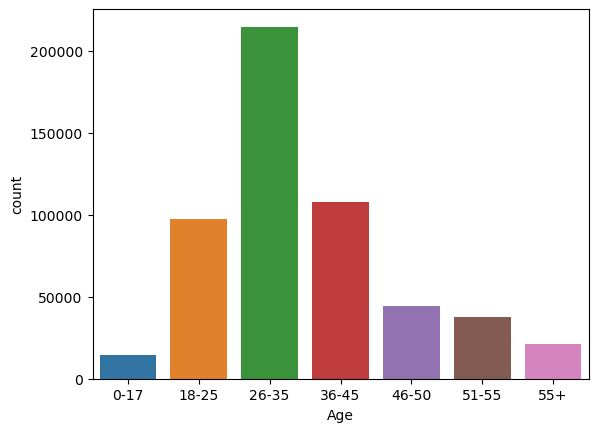

In [37]:
for i in df["Age"].unique():
    print(f'{i} : {df[df["Age"]==i].shape[0]}')

sns.countplot(data = df, x = "Age")
plt.show()

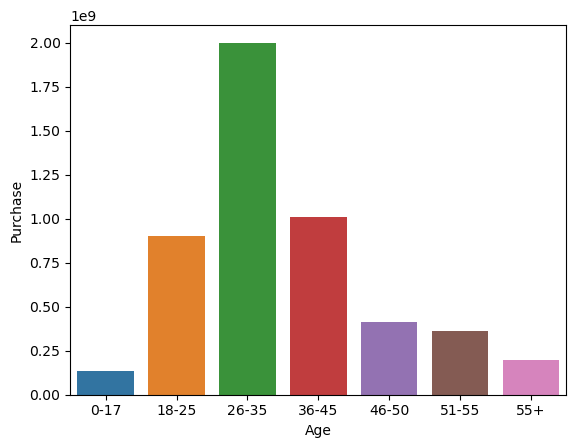

In [47]:
sns.barplot(data = df.groupby(by=["Age"]).sum()["Purchase"].reset_index(), x = "Age", y = "Purchase")
plt.show()

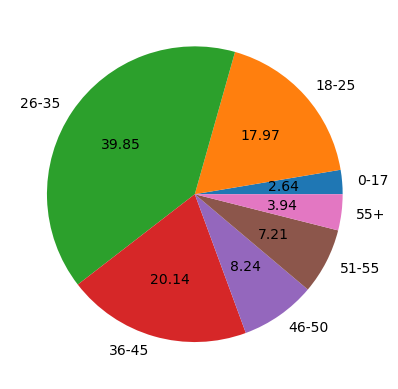

In [52]:
plt.pie(df.groupby(by=["Age"]).sum()["Purchase"], labels = df.groupby(by=["Age"]).sum()["Purchase"].index, autopct = "%.2f")
plt.show()

([<matplotlib.patches.Wedge at 0x28cbe93d0>,
 [Text(-0.31087933967974596, 1.055155929784923, '0'),
  Text(0.3108793396797463, -1.055155929784923, '1')],
 [Text(-0.16957054891622506, 0.5755395980645034, '59.12'),
  Text(0.16957054891622525, -0.5755395980645033, '40.88')])

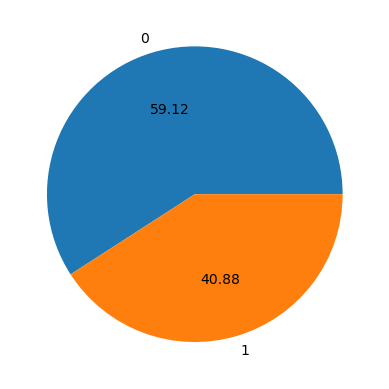

In [62]:
plt.pie(df.groupby(by=["Marital_Status"]).size(), labels = [0, 1], autopct = "%.2f")